# Análise de dados: Orçamento de redes sociais x vendas

Este é um projeto que envolve machine learning para análise de dados de marketing de orçamentos(budget) de redes sociais e a relação com as vendas geradas, os dados foram disponibilizados na plataforma [Kaggle](https://www.kaggle.com/datasets/fayejavad/marketing-linear-multiple-regression).

Sobre o conjunto de dados será adota a seguinte interpretação, a cada rede/mídia social das colunas 'youtube', 'facebook' e 'newspaper' é destinado um orçamento(budget) de marketing, sendo a que coluna 'sales' representa as vendas, o retorno do investimento em marketing.

## 📃 Demanda da análise

- Analisar a correlação dos orçamentos(budgets) com as vendas(sales)
- Gerar um modelo preditivo para relação de orçamento e vendas
  
## 📋 Tópicos da análise

1. Análise das medidas estatísticas dos dados
2. Distribuição do budget entre as mídias e os valores de vendas
3. Correlação entre as variáveis
4. Criação do modelo de regressão linear múltipla
   1. Preparação dos dados de treino e teste 
   2. Treinamento do modelo
   3. Predições do modelo com dados de treino e teste
   4. Métricas de performance
   5. Previsões com novos dados

## Importação de pacotes

In [178]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from tabulate import tabulate
from statistics import mode

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


## Carregamento dos dados

In [179]:
# Efetuando limpeza de memória antes do carregamento de dados
gc.collect()

# Caminho do arquivo csv
csv = 'dados/Marketing_Data.csv'

# Criando um dataframe a partir do arquivo csv no diretório dados
df = pd.read_csv(csv, encoding='utf-8', sep=',')

# Informações do dataset como nome das colunas, contagem de linhas, tipo de dados e memória utilizada

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


## Detalhes do dataframe

In [180]:
# Amostra de dados do dataframe

df.sample(5)


,youtube,facebook,newspaper,sales
125,225.36,25.32,11.40,18.72
119,45.60,48.36,14.28,13.08
92,22.56,26.04,60.48,8.40
106,57.96,56.40,10.20,13.92
138,248.16,6.24,23.28,14.64


In [181]:
# Quantidade de linhas e colunas

df.shape


(171, 4)

In [182]:
# Descrição dos dados

df.describe().T


,count,mean,std,min,25%,50%,75%,max
youtube,171.0,178.021053,102.449597,0.84,91.08,179.76,262.98,355.68
facebook,171.0,27.671579,17.913532,0.00,11.70,26.76,43.68,59.52
newspaper,171.0,35.240000,24.902918,0.36,13.74,31.08,50.88,121.08
sales,171.0,16.922807,6.314608,1.92,12.54,15.48,20.82,32.40


## Verificando e tratando se necessário os tipos de valores

In [183]:
# Identificando os tipos de dados das colunas

df.dtypes


youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

## Verificando e tratando se necessário os valores nulos

In [184]:
# Identificando a quantidade de valores nulos

df.isnull().sum()


youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

## Verificando e tratando se necessário os valores duplicados

In [185]:
# Identificando a quantidade de valores duplicados (True)

df.duplicated(keep='first').value_counts()


False    171
dtype: int64

## 1. Análise das medidas estatísticas dos dados

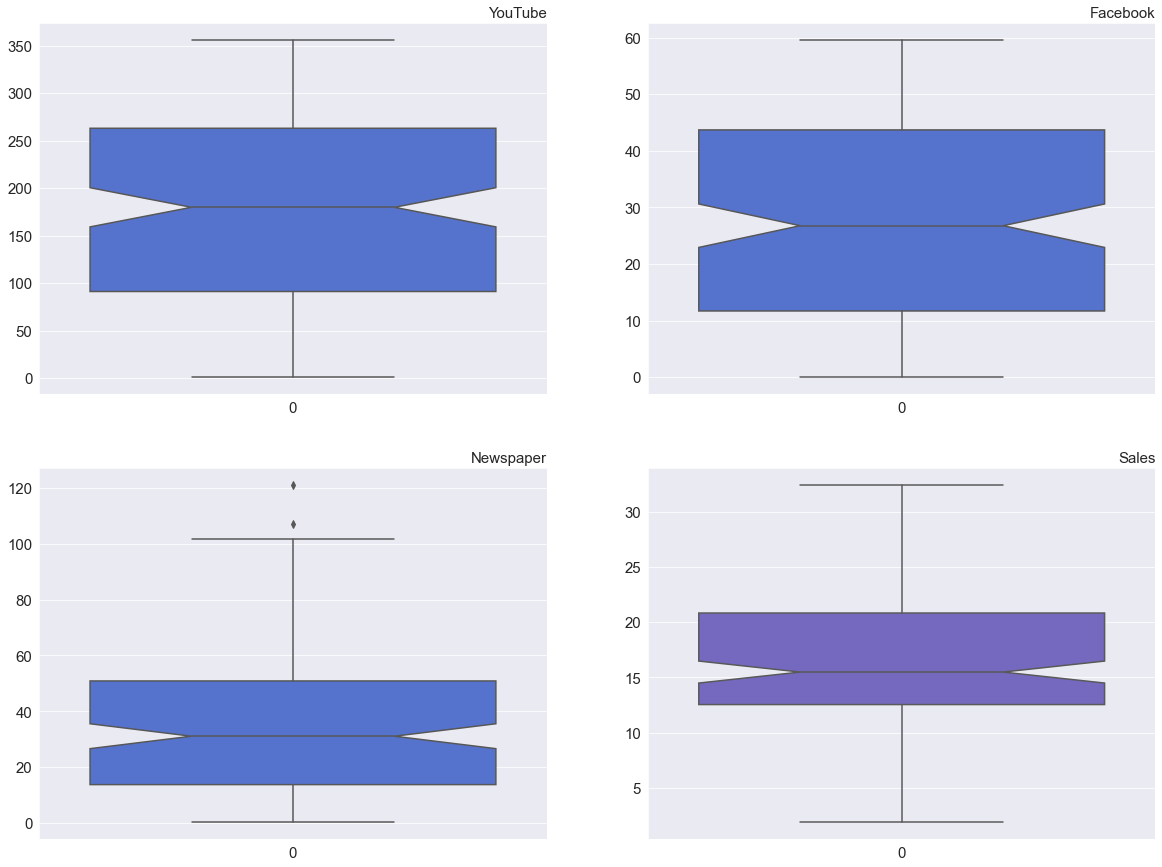

In [186]:
# Função para gerar gráficos boxplot
# param1: coluna do dataframe
# param2: nome da coluna
# param3: axis
# param4: cor, defaut: 'royalblue'

def graf_bloxplot(param1, param2, param3, param4='royalblue'):
    sns.boxplot(data=param1, ax=param3, color=param4, notch=True)
    param3.set_ylabel('')
    param3.set_xlabel('')
    param3.tick_params(labelsize=15)
    param3.set_title(param2, loc='right', fontsize=15)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2, nrows=2, figsize=(20, 15))

graf_bloxplot(df['youtube'], 'YouTube', ax1)
graf_bloxplot(df['facebook'], 'Facebook', ax2)
graf_bloxplot(df['newspaper'], 'Newspaper', ax3)
graf_bloxplot(df['sales'], 'Sales', ax4, 'slateblue')

plt.show()


## 2. Distribuição do budget entre as mídias e os valores de vendas

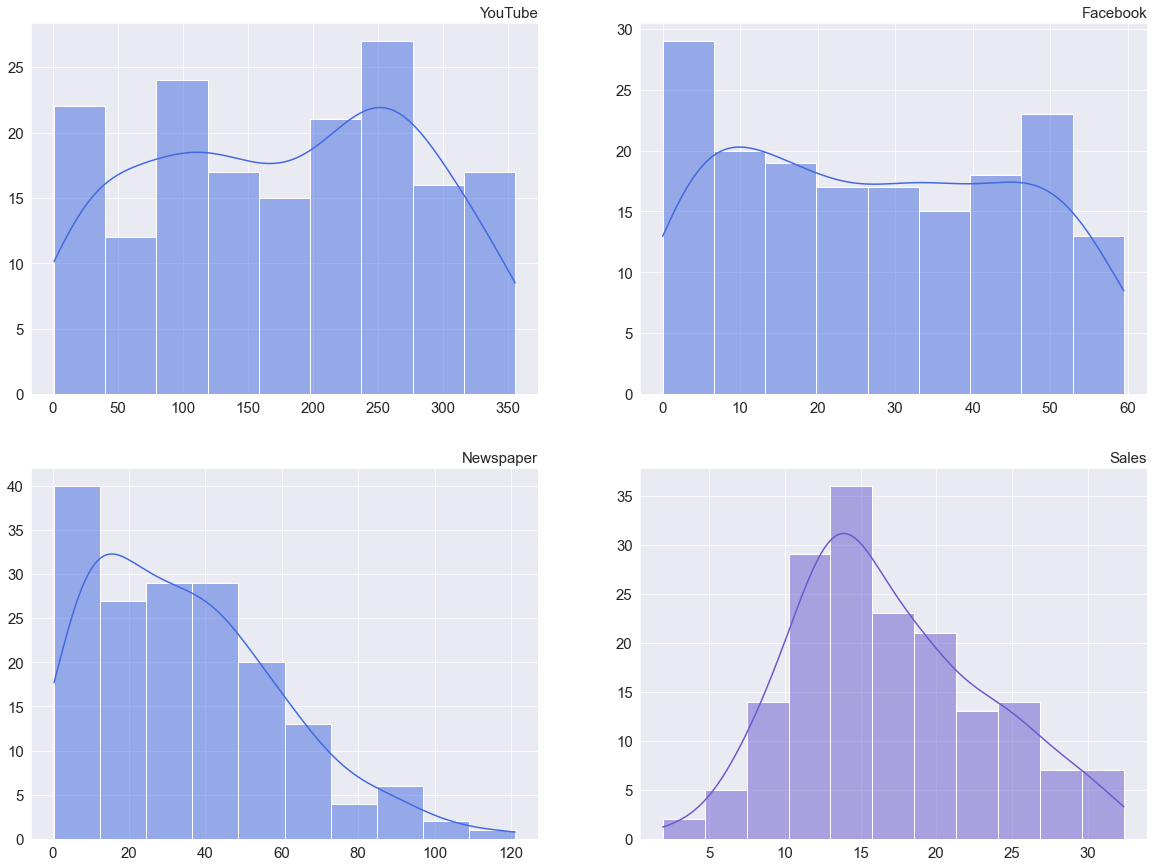

In [187]:
# Função para gerar gráficos histograma
# param1: coluna do dataframe
# param2: nome da coluna
# param3: axis
# param4: cor, defaut: 'royalblue'

def graf_histplot(param1, param2, param3, param4='royalblue'):
    sns.histplot(data=param1, ax=param3, color=param4, kde=True)
    param3.set_ylabel('')
    param3.set_xlabel('')
    param3.tick_params(labelsize=15)
    param3.set_title(param2, loc='right', fontsize=15)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2, nrows=2, figsize=(20, 15))

graf_histplot(df['youtube'], 'YouTube', ax1)
graf_histplot(df['facebook'], 'Facebook', ax2)
graf_histplot(df['newspaper'], 'Newspaper', ax3)
graf_histplot(df['sales'], 'Sales', ax4, 'slateblue')

plt.show()


## 3. Correlação entre as variáveis

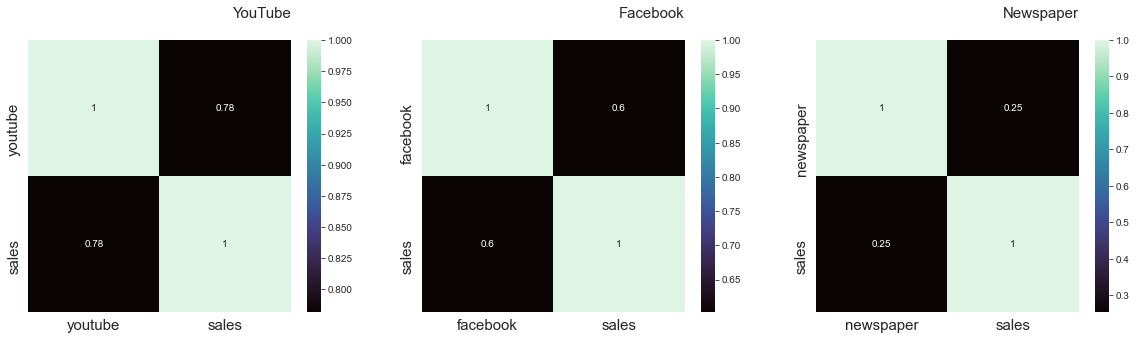

In [188]:
# Função para gerar gráficos heatmap
# param1: correlação
# param2: nome da variável
# param3: axis


def graf_heatmap(param1, param2, param3, param4='royalblue'):
    sns.heatmap(data=param1, ax=param3, annot=True, cmap="mako")
    param3.tick_params(labelsize=15)
    param3.set_title(param2, loc='right', fontsize=15)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

graf_heatmap(df[['youtube', 'sales']].corr(), 'YouTube\n', ax1)
graf_heatmap(df[['facebook', 'sales']].corr(), 'Facebook\n', ax2)
graf_heatmap(df[['newspaper', 'sales']].corr(), 'Newspaper\n', ax3)

plt.show()


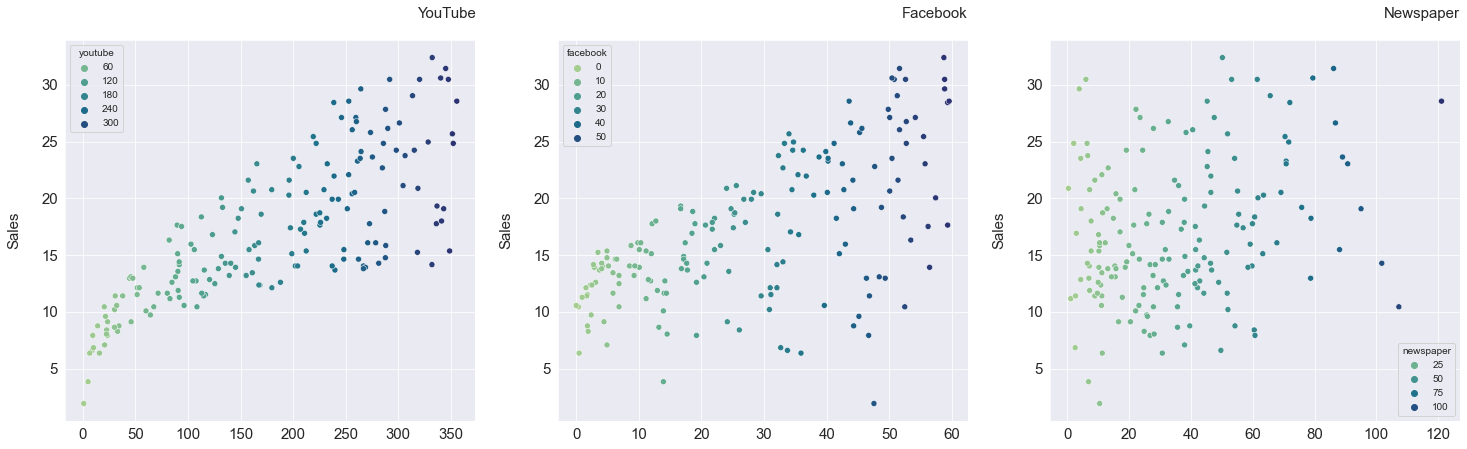

In [189]:
# Função para gerar gráficos scatterplot
# param1: dataframe
# param2: nome da variável independente
# param3: nome da variável dependente
# param4: nome do gráfico(coluna)
# param5: axis


def graf_scatterplot(param1, param2, param3, param4, param5):
    sns.scatterplot(data=param1, x=param2, y=param3,
                    ax=param5, hue=param2, palette='crest')
    param5.set_ylabel('Sales\n', fontsize=15)
    param5.set_xlabel('')
    param5.tick_params(labelsize=15)
    param5.set_title(param4, loc='right', fontsize=15)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 7))

graf_scatterplot(df, df['youtube'], df['sales'], 'YouTube\n', ax1)
graf_scatterplot(df, df['facebook'], df['sales'], 'Facebook\n', ax2)
graf_scatterplot(df, df['newspaper'], df['sales'], 'Newspaper\n', ax3)

plt.show()


## 4. Criação do modelo de regressão linear múltipla

### 1. Preparação dos dados de treino e teste

In [190]:
# features, variáveis independentes
X = df.drop(['sales'], axis=1)

# variável resposta, variável dependente
y = df['sales'].copy()

# separação dos dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=40)


### 2. Treinamento do modelo

In [191]:
# definição do modelo de regressão linear
model = LinearRegression()

# treinamento do modelo
model.fit(x_train, y_train)

# score R^2, coeficiente de determinação, percentual de "explicação" que o modelo é capaz de determinar
print('\nMétrica do modelo')
print('\nScore R^2:', model.score(x_train, y_train))



Métrica do modelo

Score R^2: 0.8927424625684892


### 3. Predições do modelo com dados de treino e teste

In [192]:
# predição com dados de treino
pred_train = model.predict(x_train)

# predição com dados de teste
pred_test = model.predict(x_test)

print('\nPredições com dados de teste')
display(pred_test)

# score R^2, coeficiente de determinação, percentual de "explicação" que o modelo é capaz de determinar
print('\nMétrica do modelo com dados de teste')
print('\nScore R^2:', model.score(x_test, y_test))



Predições com dados de teste


array([14.38393486, 22.20727881, 28.91796198, 21.96404564,  9.68498913,
       25.88482408,  6.40923441, 21.86151378,  9.11435137, 10.08924451,
       22.30282533, 16.32620836, 12.86020273, 24.75797925, 14.86003156,
       11.73513543, 21.36943486, 19.70261419, 12.32761409,  9.19107329,
       11.76363196, 15.30568991, 16.50895538, 12.56324027, 23.08420981,
       20.32981219, 17.34309964, 14.63509377, 12.23865573, 19.65806856,
       14.34453015, 22.05487428, 11.64916513, 25.20841212, 13.67626079,
       10.76368652, 12.68424252, 24.0184601 , 27.85362855, 18.96963453,
       12.10434648, 20.64879598, 15.09357635, 14.39897994, 17.45086929,
       11.05274907, 16.678733  , 25.64859879, 16.44955443, 10.813497  ,
        4.50547762, 22.60411007])


Métrica do modelo com dados de teste

Score R^2: 0.9189070299606017


### 4. Métricas de performance

In [193]:
# treino - r2, rmse, mae e mape
r2_train = r2_score(y_train, pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
mae_train = mean_absolute_error(y_train, pred_train)
mape_train = mean_absolute_percentage_error(y_train, pred_train)

# teste - r2, rmse, mae e mape
r2_test = r2_score(y_test, pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
mae_test = mean_absolute_error(y_test, pred_test)
mape_test = mean_absolute_percentage_error(y_test, pred_test)

data = {
    '': ['Treino', 'Teste'],
    'R^2': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test],
    'MAE': [mae_train, mae_test],
    'MAPE': [mape_train, mape_test]
}

print(tabulate(data, headers='keys', tablefmt='fancy_outline',
               floatfmt=('.8f', '.8f', '.8f')))


╒════════╤════════════╤════════════╤═════════╤══════════╕
│        │        R^2 │       RMSE │     MAE │     MAPE │
╞════════╪════════════╪════════════╪═════════╪══════════╡
│ Treino │ 0.89274246 │ 2.08305888 │ 1.50704 │ 0.153817 │
│ Teste  │ 0.91890703 │ 1.74997430 │ 1.44188 │ 0.1093   │
╘════════╧════════════╧════════════╧═════════╧══════════╛


### 5. Previsões com novos dados

In [194]:
teste = np.array([100,110,120])
teste = teste.reshape(1,-1)
model.predict(teste)

array([28.93742754])